# Exercise 1 - Data preperation

## Q1.1 Load the dataset


Visualized for better readability:


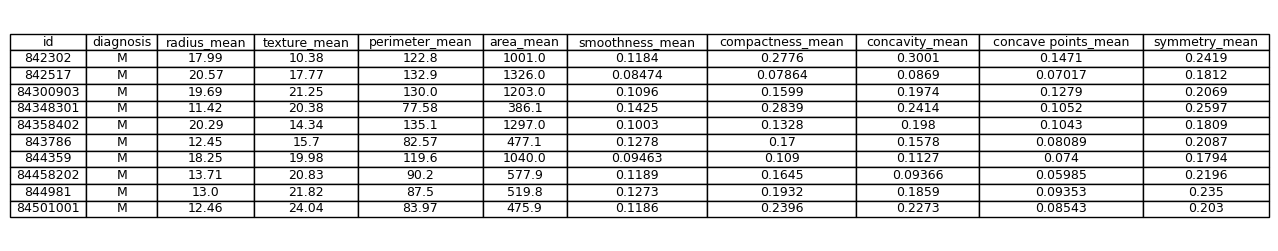

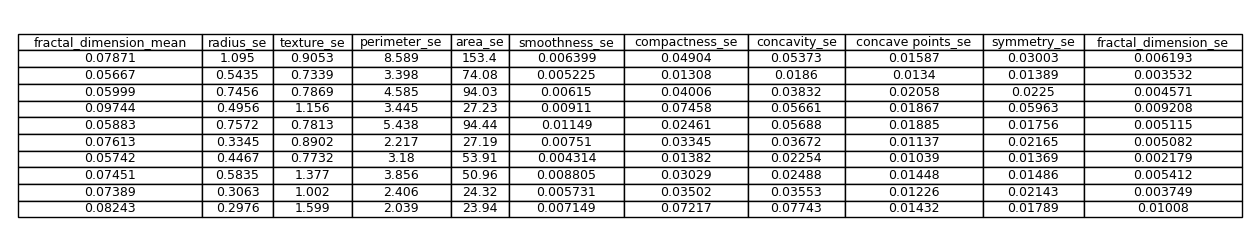

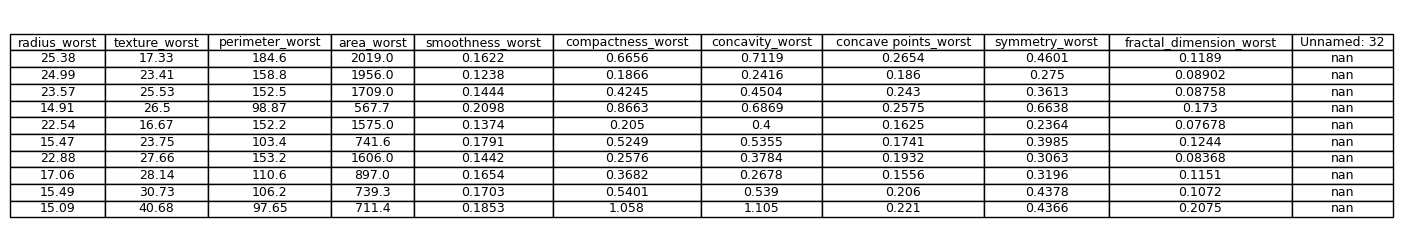

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../archive/data.csv")

sample = df.head(10)  # change number to see more rows

num_splits = 3  # splitting the image so i can actually read the thing. 
columns_split = np.array_split(sample.columns, num_splits)

print("Visualized for better readability:")

for i, cols in enumerate(columns_split, start=1):
    fig, ax = plt.subplots(figsize=(16, 3))  # wider 
    ax.axis("off")
    
    table = ax.table(
        cellText=sample[cols].values,
        colLabels=cols,
        cellLoc='center',
        loc='center'
    )
    
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.auto_set_column_width(col=list(range(len(cols))))
    
    #plt.tight_layout()
    plt.show()



I have limited the output to only include 10 rather than the whole 569 entries (looked at the csv file). As we can see all the entries included above have the diagnosis 'M' meaning malignant as the diagnosis of breast tissues (based on documentation here https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

When looking purely at this snippet of the dataset you would get the wrong intention of the whole dataset seeing how on kaggle its shown that benign diagnosis make up 63% of the diagnosis whilst magilant only makes up the remainer 37%.

![Bias in Breast Cancer Dataset](../images/bias_breastcancer.PNG)


## Q1.2 Dataset split and 
First before training on anything we have to split the data into training, validation and test sets. This split will be 60% training, 20% validation, 20% test.

To do this we first split the set in 60 (training) / 40. 

The 40 then will be split 20/20 for validation and test 

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore') # Dont need ids for this.

X = df.drop(columns=['diagnosis']) # As we've seen from Q1.1 diagnosis are M or B
y = df['diagnosis'].map({'M':1, 'B':0})  # M -> 1, B -> 0

# Check target distribution
print("Target distribution (proportion):")
print(y.value_counts(normalize=True))

# 60/20/20 split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y # 42 meaning of life or something like that :P
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("\nDataset sizes:")
print("Training:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

# Standardization
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_std = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


Target distribution (proportion):
diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

Dataset sizes:
Training: (341, 30)
Validation: (114, 30)
Test: (114, 30)


In [63]:
import seaborn as sns # just so it looks less boring ig. 

def plot_feature_chunks_boxplot(df, y=None, title="Feature Boxplots", num_chunks=3):
    columns_split = np.array_split(df.columns, num_chunks)
    
    for i, cols in enumerate(columns_split, start=1):
        num_cols = len(cols)
        fig, axes = plt.subplots(1, num_cols, figsize=(5*num_cols, 5))
        if num_cols == 1:
            axes = [axes]
        
        for ax, col in zip(axes, cols):
            if y is not None:
                
                sns.boxplot(x=y, y=df[col], ax=ax, palette={0:"#1f77b4", 1:"#ff7f0e"})
                ax.set_xlabel("Class")
            else:
                sns.boxplot(y=df[col], ax=ax, color="skyblue")
            ax.set_title(col, fontsize=10)
            ax.grid(True, linestyle='--', alpha=0.4)
        plt.suptitle(f"{title} (Columns {i})", fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


### Non standarized plot

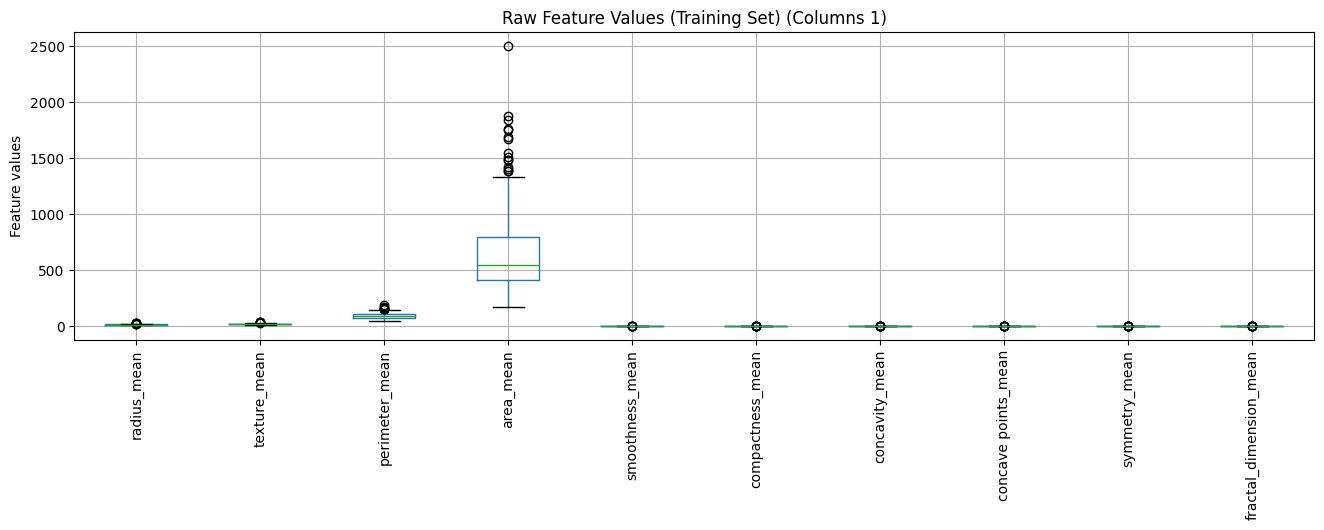

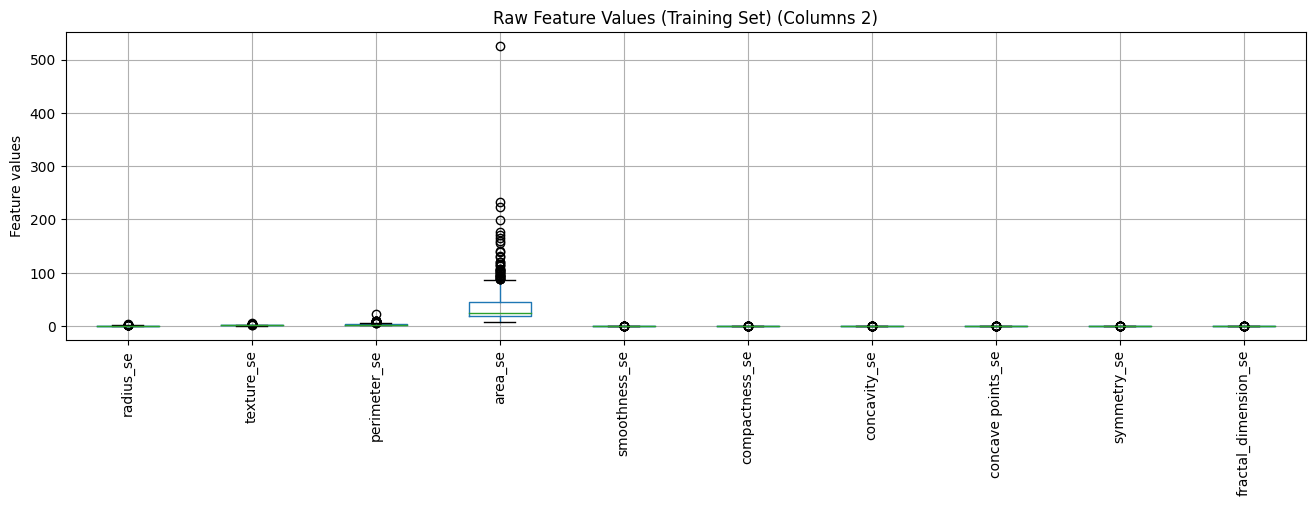

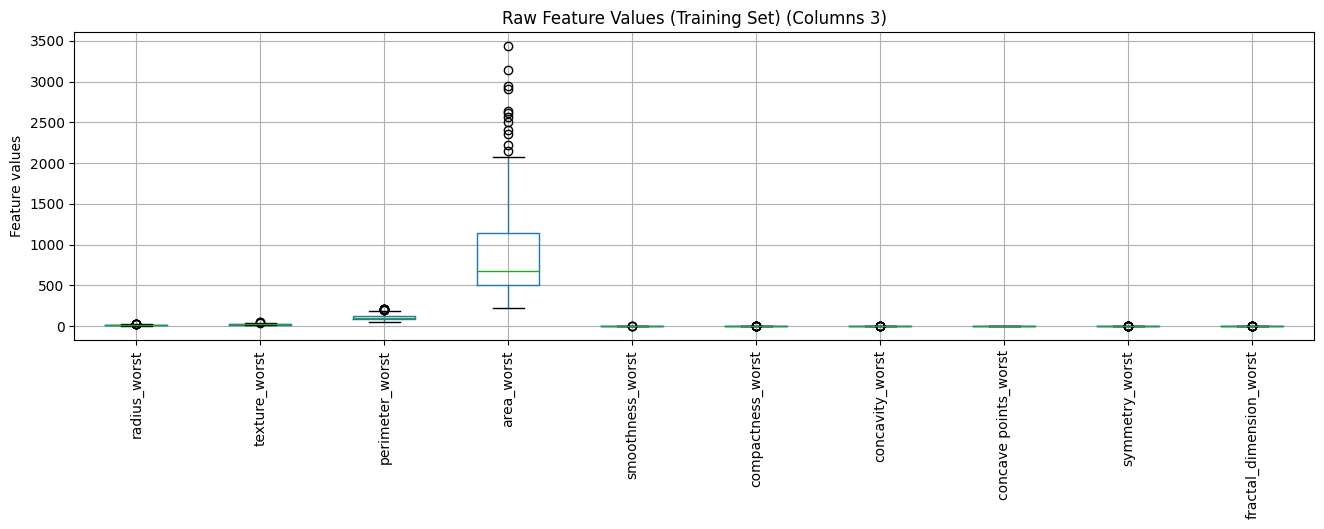

In [64]:
plot_feature_chunks(X_train, "Raw Feature Values (Training Set)")


###  Plotting after standarization

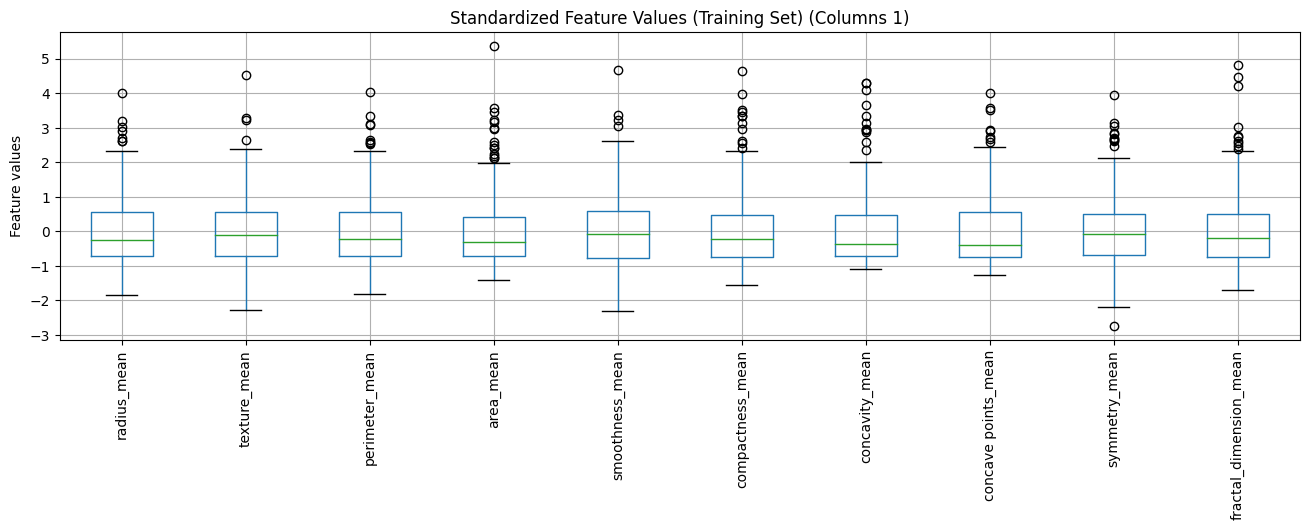

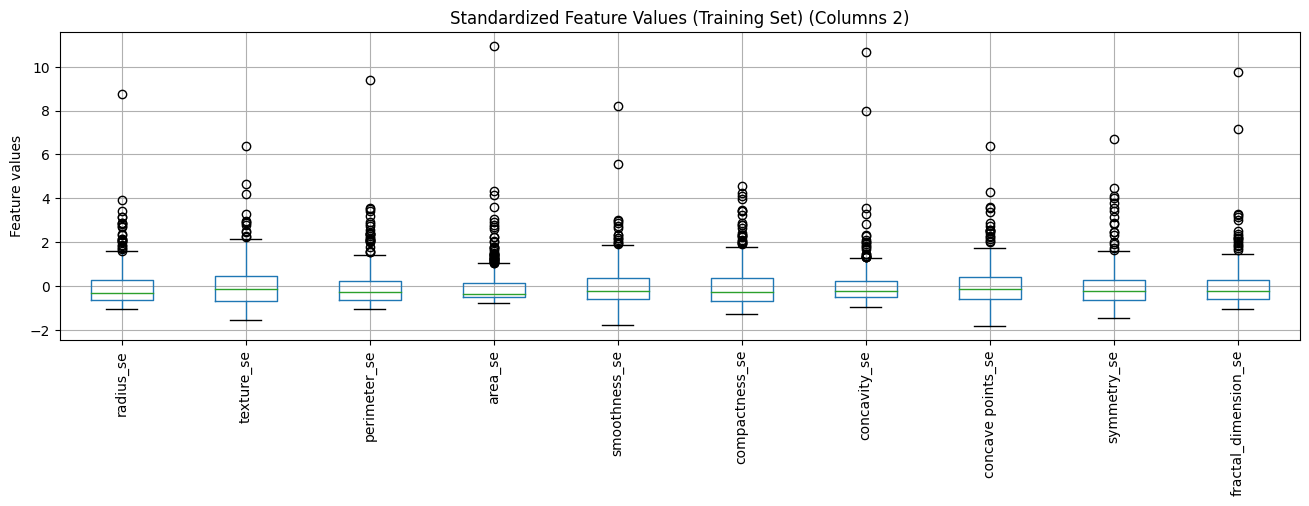

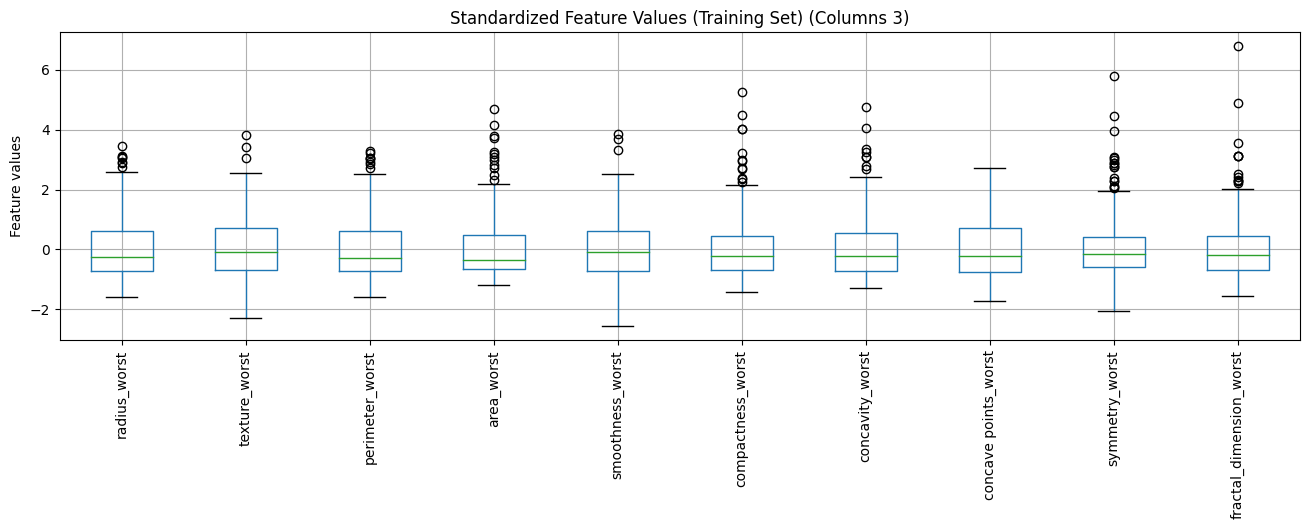

In [65]:
plot_feature_chunks(X_train_std, "Standardized Feature Values (Training Set)")
